In [5]:
#|default_exp app

dogvcats

In [6]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

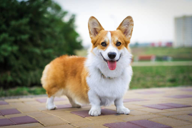

In [7]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [9]:
#|export
learn = load_learner('model.pkl')

In [11]:
learn.predict(im)

('False', TensorBase(0), TensorBase([0.9982, 0.0018]))

In [13]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [15]:
classify_image(im)

{'Dog': 0.9982355833053589, 'Cat': 0.0017644100589677691}

In [21]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['dog.jpg', 'cat.jpg', 'meowth.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

/Users/gabriel/mambaforge/lib/python3.10/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/Users/gabriel/mambaforge/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/Users/gabriel/mambaforge/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/Users/gabriel/mambaforge/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


Export

In [23]:
import nbdev
nbdev.export.nb_export('dogvcats.ipynb', 'app')
print('Export successful')

Export successful
